# MNIST - Categorical Classification
> Overfitting Issue

## Import Tensorflow & Keras

- import TensorFlow

In [ ]:
import tensorflow as tf
tf.__version__

'2.4.1'

- GPU 설정 확인

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

- import Keras

In [ ]:
import keras
keras.__version__

'2.4.3'

# Ⅰ.MNIST Data_Set Load & Review


> ## 1) Load MNIST Data_Set

In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


- Train_Data Information

In [ ]:
print(len(X_train))
print(X_train.shape) # 이미지 6만장이 28 x 28의 일정한 크기로 구성되어 있다

print(len(y_train))
print(y_train[0:5])

60000
(60000, 28, 28)
60000
[5 0 4 1 9]


- Test_Data Information

In [ ]:
print(len(X_test))
print(X_test.shape) # 이미지 1만장이 28 x 28의 일정한 크기로 구성되어 있다


print(len(y_test))
print(y_test[0:5])

10000
(10000, 28, 28)
10000
[7 2 1 0 4]


> ## 2) Visualization

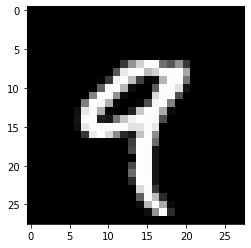

In [ ]:
import matplotlib.pyplot as plt
digit = X_train[4]  # 9인지 확인
plt.imshow(digit, cmap = 'gray')
plt.show()

In [ ]:
import numpy as np
np.set_printoptions(linewidth = 150) 

print(X_train[4]) # array로 확인

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 25

# Ⅱ. Data Preprocessing



> ## 1) Reshape and Normalization

- reshape
   - (60000, 28, 28) to (60000, 28 * 28)
   - 한 차원 내린다

In [ ]:
X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

- Normalization

In [ ]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255
# 정규화식 : x - min / max - min인데, min = 0, max = 255이라서 255로 나눈다

In [ ]:
print(X_train[4])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

> ## 2) One Hot Encoding

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print(y_train[:5])
# 5, 0, 4, 1, 9 표현

print(y_test[:5])
# 7, 2, 1, 0, 4 표현

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


# Ⅲ. MNIST Keras Modeling

> ## 1) Model Define

- 모델 신경망 구조 정의
   - 2개의 Hidden Layers & 768개의 nodes
   - BatchNormalization 적용

In [ ]:
from keras import models
from keras import layers

mnist = models.Sequential()
mnist.add(layers.Dense(512, input_shape = (28 * 28,))) # 784 * 512 + 512
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation ('relu'))
mnist.add(layers.Dense(256)) # 512 * 256 + 256
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation ('relu'))
mnist.add(layers.Dense(10, activation = 'softmax')) # 256 * 10 + 10

- 모델 구조 확인

In [ ]:
mnist.summary()
# 파라미터가 53만개를 넘어섰다 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2

> ## 2) Model Compile

- 모델 학습방법 설정

In [ ]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])
# 0 ~ 9를 분류해야 하니까 다중분류_CEE

> ## 3) Model Fit

- 약 3분

In [ ]:
%%time
hist_mnist = mnist.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 5s 5ms/step - loss: 0.3133 - accuracy: 0.9063 - val_loss: 0.1004 - val_accuracy: 0.9687
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0742 - accuracy: 0.9772 - val_loss: 0.0905 - val_accuracy: 0.9732
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0426 - accuracy: 0.9869 - val_loss: 0.0949 - val_accuracy: 0.9729
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0297 - accuracy: 0.9912 - val_loss: 0.1004 - val_accuracy: 0.9744
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0216 - accuracy: 0.9934 - val_loss: 0.0970 - val_accuracy: 0.9758
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0161 - accuracy: 0.9946 - val_loss: 0.0938 - val_accuracy: 0.9772
Epoch 7/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0132 - accuracy: 0.9954 - val_loss: 0.0909 - val_accuracy: 0.9780

> ## 4) 학습 결과 시각화 - Overfitting

- Loss Visualization

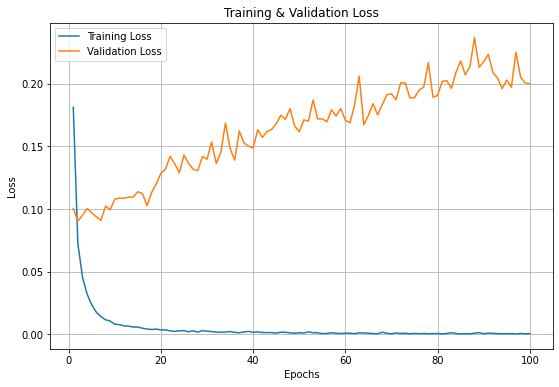

In [ ]:
import matplotlib.pyplot as plt
epochs = range(1, len(hist_mnist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, hist_mnist.history['loss'])
plt.plot(epochs, hist_mnist.history['val_loss'])
plt.title('Training & Validation Loss')
# plt.ylim(0, 0.2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()
# overfitting이 기존 모델보다 줄었음을 확인

> ## 5) Model Evaluate

- Loss & Accuracy

In [ ]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))
# test data에서 accuracy = 0.982 나옴 
# Accuracy = Dropout모델 > 기본 모델 = BN모델 > 파라미터 줄인 모델 > 규제화 + 파라미터 줄인 모델 > 규제화

313/313 [==============================] - 1s 2ms/step - loss: 0.1643 - accuracy: 0.9827
Loss = 0.16433
Accuracy = 0.98270


> ## 6) Model Predict

- Probability

In [ ]:
np.set_printoptions(suppress = True, precision = 9)
print(mnist.predict(X_test[:1,:]))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


- Class

In [ ]:
print(mnist.predict_classes(X_test[:1,:]))

[7]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


### 
# The End
###